In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ssl
import time

# ssl._create_default_https_context = ssl._create_unverified_context
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

c:\users\bloqd\documents\uni\mro\interpreter\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


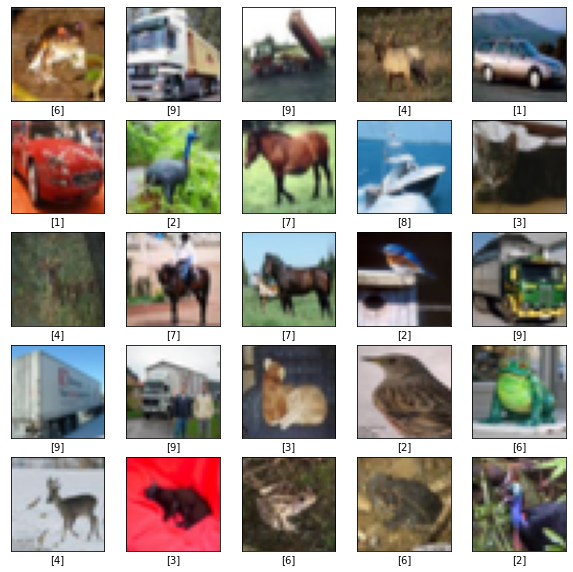

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
print(y_train)
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train)

print(y_test)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model.add(tf.keras.layers.Rescaling(1 / 255))
model.add(tf.keras.layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'))
model.add(tf.keras.layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
# 1180 parametrów

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 5)         140       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 5)         230       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 5)           0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                810       
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
______________________________________________________

In [6]:
results = model(x_test[:10])
print(results)

tf.Tensor(
[[0.10860689 0.11701354 0.04952906 0.05270307 0.10993505 0.2951345
  0.06385636 0.03685401 0.03174463 0.13462284]
 [0.11110818 0.11630145 0.04997177 0.05221237 0.11324023 0.29593605
  0.06430139 0.03606252 0.03174253 0.12912357]
 [0.11005846 0.11763354 0.05015388 0.05248882 0.11195789 0.29359353
  0.06353243 0.03695722 0.03206451 0.13155977]
 [0.10949121 0.11709689 0.05058891 0.05238367 0.11202214 0.29495695
  0.06430556 0.03691876 0.03202862 0.13020727]
 [0.10792916 0.11709633 0.04893183 0.05172285 0.10857378 0.30014858
  0.06344628 0.03649696 0.03146439 0.13418977]
 [0.10758435 0.11653224 0.04991775 0.05313586 0.10936516 0.29570436
  0.06393058 0.03657607 0.0318068  0.13544677]
 [0.10714314 0.11638422 0.04904391 0.05249523 0.10856221 0.30165592
  0.06287557 0.03589996 0.03164306 0.13429676]
 [0.10938007 0.11762832 0.04983725 0.05365108 0.10925682 0.29447356
  0.06336711 0.03702785 0.0316181  0.1337598 ]
 [0.10849348 0.11679547 0.04946985 0.05198209 0.11176945 0.29721838
  

In [7]:
x_prototype = x_train
y_prototype = y_train

x_test_prototype = x_test
y_test_prototype = y_test

print(x_prototype.shape)
print(y_prototype.shape)

(50000, 32, 32, 3)
(50000, 10)


In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
start = time.time()
history1 = model.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                     validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model.save("model_1")
time1 = end - start
print("Train time: " + str(time1))

INFO:tensorflow:Assets written to: model_1\assets
Train time: 514.1434924602509


In [16]:
results = model(x_test[:10])
print(results)

tf.Tensor(
[[2.6484381e-02 2.7710995e-02 5.6908175e-02 3.0850205e-01 2.0662988e-02
  1.2569620e-01 3.0519509e-01 3.1763767e-03 1.1941027e-01 6.2535051e-03]
 [1.5867423e-01 5.3595471e-01 1.3197039e-03 4.9424019e-05 3.0567948e-04
  1.6675000e-05 2.2345741e-04 2.7605859e-04 1.6808069e-01 1.3509934e-01]
 [2.7355841e-01 4.6381470e-02 1.0231543e-02 5.2153533e-03 2.7048781e-03
  2.2777990e-03 9.1936433e-04 2.0340655e-03 6.2026393e-01 3.6413230e-02]
 [4.3116981e-01 5.1794171e-02 1.1993516e-01 3.3883300e-02 2.1511998e-02
  9.1667110e-03 5.9981118e-03 2.7682124e-02 2.0234121e-01 9.6517406e-02]
 [7.2664907e-03 2.0065075e-03 8.9652762e-02 1.6424327e-01 2.4895169e-01
  8.1111893e-02 3.7434873e-01 2.4021432e-02 7.0207119e-03 1.3764247e-03]
 [1.5294878e-02 2.6685882e-02 8.2623899e-02 1.8537244e-01 1.2836117e-01
  1.3726048e-01 2.1367918e-01 1.7759736e-01 8.0054421e-03 2.5119292e-02]
 [1.4755449e-02 6.9390118e-01 3.9687385e-03 1.5784512e-01 5.5377069e-04
  6.4443775e-02 3.6835929e-03 1.9879150e-03 7.6

In [10]:
def plot_results(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1.1)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(-0.1,5)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

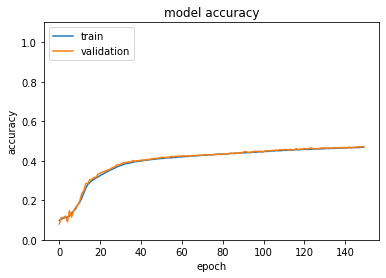

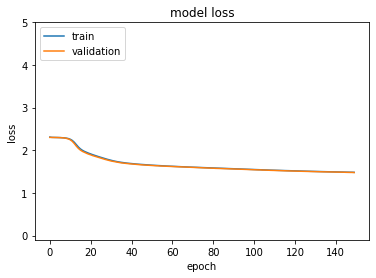

In [11]:
plot_results(history1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3210      
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
____________________________________________________

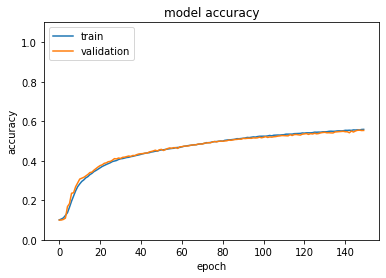

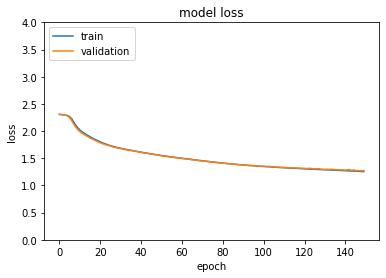

In [31]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model2.add(tf.keras.layers.Rescaling(1 / 255))
model2.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'))
model2.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.summary()

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history2 = model2.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model2.save("model_2")
time2 = end - start
print("Train time: " + str(time2))
plot_results(history2)

In [32]:
def conv_block(filters, model):
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='sigmoid'))
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='sigmoid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 40)        7240      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 40)        14440     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 40)         

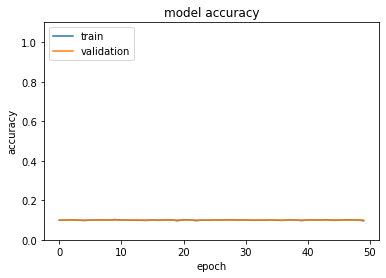

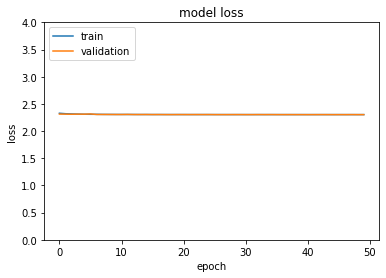

In [33]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model3.add(tf.keras.layers.Rescaling(1 / 255))

conv_block(20, model3)
conv_block(40, model3)

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.summary()

model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
history3 = model3.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=50,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
model3.save("model_3")
plot_results(history3)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 40)        7240      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 40)        14440     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 40)         

INFO:tensorflow:Assets written to: model_4\assets


INFO:tensorflow:Assets written to: model_4\assets


Train time: 696.9492626190186


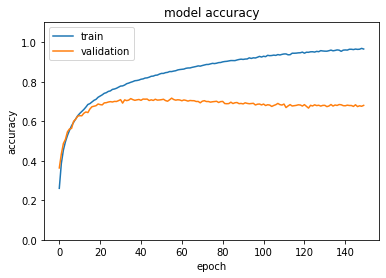

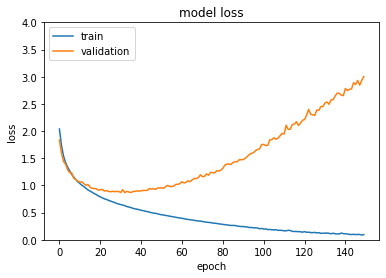

In [34]:
def conv_block_relu(filters, model):
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='ReLU'))
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='ReLU'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model4.add(tf.keras.layers.Rescaling(1 / 255))

conv_block_relu(20, model4)
conv_block_relu(40, model4)

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(10, activation='softmax'))
model4.summary()

model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history4 = model4.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model4.save("model_4")
time4 = end - start
print("Train time: " + str(time4))
plot_results(history4)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 40)        7240      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 40)        14440     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 40)         

INFO:tensorflow:Assets written to: model_5\assets


INFO:tensorflow:Assets written to: model_5\assets


Train time: 960.0276634693146


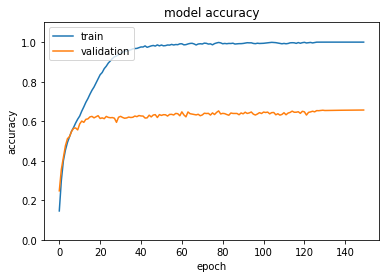

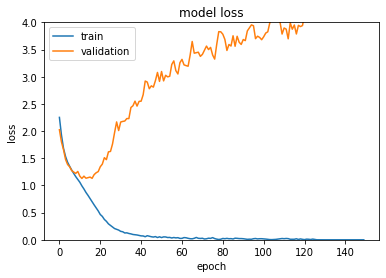

In [35]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model5.add(tf.keras.layers.Rescaling(1 / 255))

conv_block_relu(20, model5)
conv_block_relu(40, model5)
conv_block_relu(80, model5)
conv_block_relu(160, model5)

model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(10, activation='softmax'))
model5.summary()

model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history5 = model5.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model5.save("model_5")
time5 = end - start
print("Train time: " + str(time5))
plot_results(history5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 20)        80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 40)       

INFO:tensorflow:Assets written to: model_6\assets


INFO:tensorflow:Assets written to: model_6\assets


Train time: 1205.5637092590332


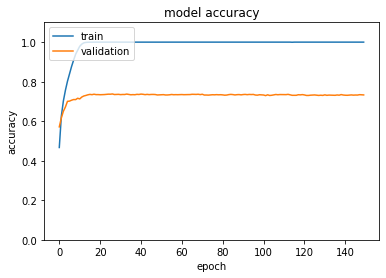

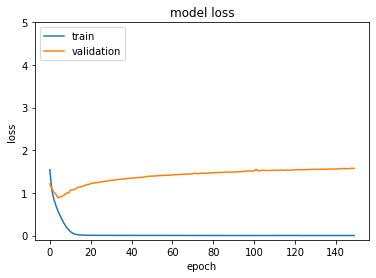

In [12]:
def conv_block_relu_batch(filters, model):
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='ReLU'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='ReLU'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model6.add(tf.keras.layers.Rescaling(1 / 255))

conv_block_relu_batch(20, model6)
conv_block_relu_batch(40, model6)
conv_block_relu_batch(80, model6)
conv_block_relu_batch(160, model6)


model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(10, activation='softmax'))
model6.summary()

model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history6 = model6.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model6.save("model_6")
time6 = end - start
print("Train time: " + str(time6))
plot_results(history6)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 20)        3620      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 20)       

INFO:tensorflow:Assets written to: model_7\assets


INFO:tensorflow:Assets written to: model_7\assets


Train time: 1257.6878762245178


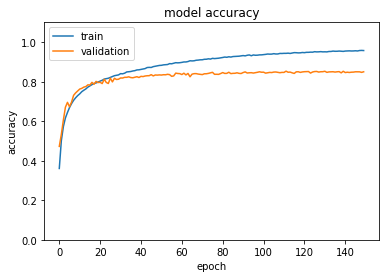

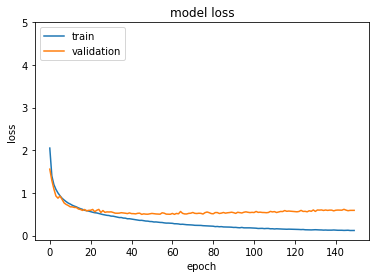

In [13]:
model7 = tf.keras.Sequential()

model7.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model7.add(tf.keras.layers.Rescaling(1 / 255))

conv_block_relu_batch(20, model7)
model7.add(tf.keras.layers.Dropout(0.1))

conv_block_relu_batch(40, model7)
model7.add(tf.keras.layers.Dropout(0.2))

conv_block_relu_batch(80, model7)
model7.add(tf.keras.layers.Dropout(0.3))

conv_block_relu_batch(160, model7)
model7.add(tf.keras.layers.Dropout(0.4))

model7.add(tf.keras.layers.Flatten())
model7.add(tf.keras.layers.Dense(10, activation='softmax'))
model7.summary()

model7.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history7 = model7.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model7.save("model_7")
time7 = end - start
print("Train time: " + str(time7))
plot_results(history7)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, None, None, 3)     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, None, None, 20)    560       
_________________________________________________________________
batch_normalization_16 (Batc (None, None, None, 20)    80        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, None, None, 20)    3620      
_________________________________________________________________
batch_normalization_17 (Batc (None, None, None, 20)    80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, None, None, 20)    0         
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 20)   

INFO:tensorflow:Assets written to: model_8\assets


INFO:tensorflow:Assets written to: model_8\assets


Train time: 1217.8617057800293


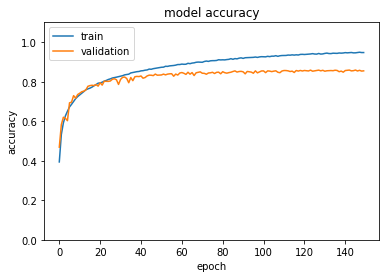

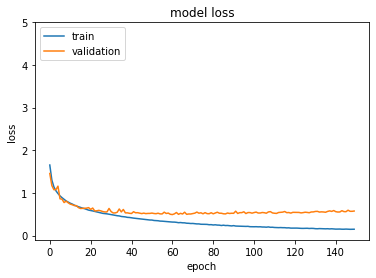

In [14]:
model8 = tf.keras.Sequential()

model8.add(tf.keras.layers.Input(shape=(None, None, 3)))
model8.add(tf.keras.layers.Rescaling(1 / 255))

conv_block_relu_batch(20, model8)
model8.add(tf.keras.layers.Dropout(0.1))

conv_block_relu_batch(40, model8)
model8.add(tf.keras.layers.Dropout(0.2))

conv_block_relu_batch(80, model8)
model8.add(tf.keras.layers.Dropout(0.3))

model8.add(tf.keras.layers.Conv2D(160, (3, 3), padding='same', activation='ReLU'))
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Conv2D(160, (3, 3), padding='same', activation='ReLU'))
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.GlobalAvgPool2D())
model8.add(tf.keras.layers.Dropout(0.4))


model8.add(tf.keras.layers.Flatten())
model8.add(tf.keras.layers.Dense(10, activation='softmax'))
model8.summary()

model8.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy',
               metrics=['accuracy'])
start = time.time()
history8 = model8.fit(x=x_prototype, y=y_prototype, batch_size=64, epochs=150,
                      validation_data=(x_test_prototype, y_test_prototype), verbose=0, use_multiprocessing=True)
end = time.time()
model8.save("model_8")
time8 = end - start
print("Train time: " + str(time8))
plot_results(history8)

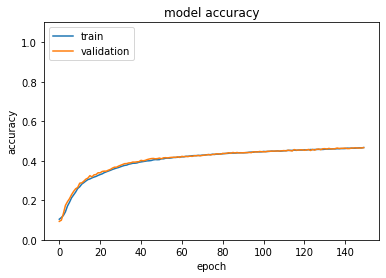

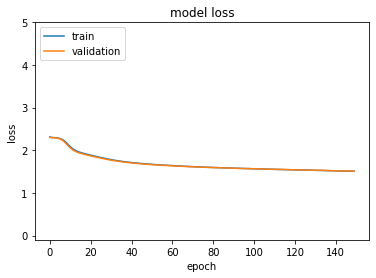

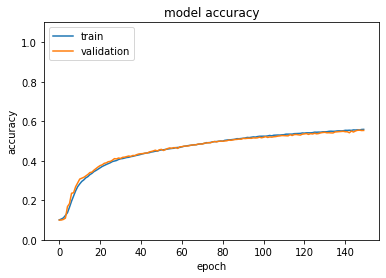

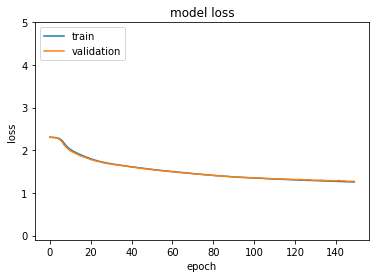

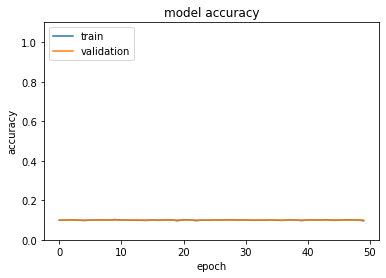

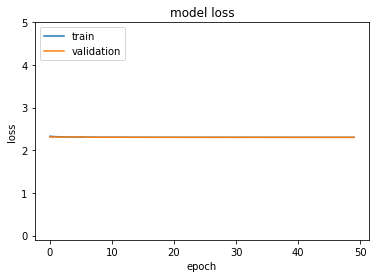

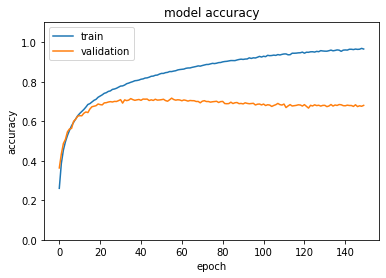

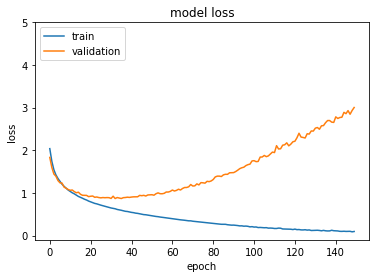

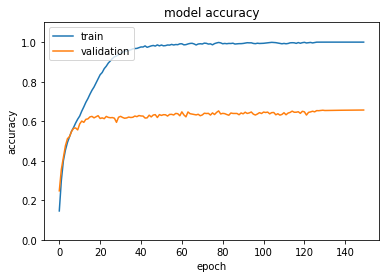

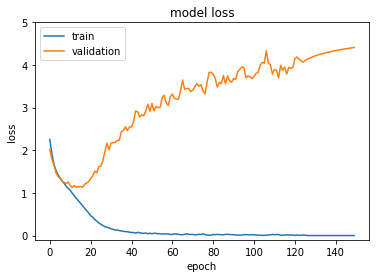

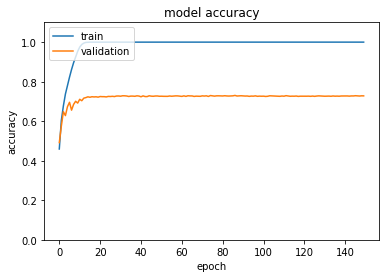

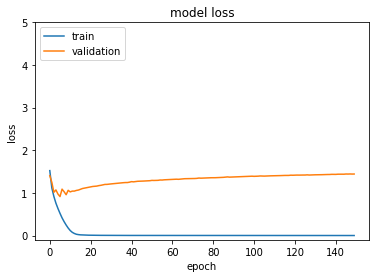

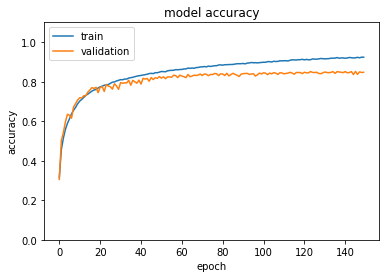

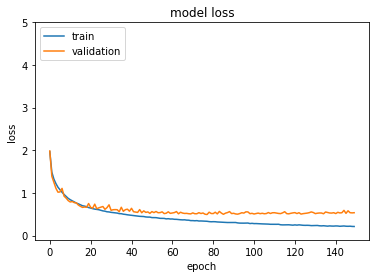

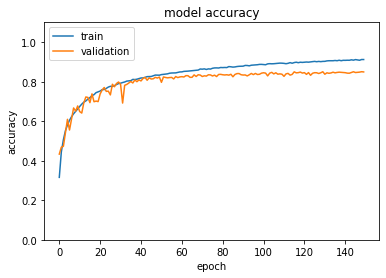

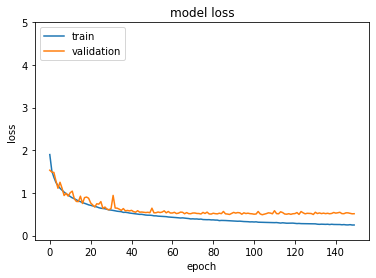

In [43]:
plot_results(history1)
plot_results(history2)
plot_results(history3)
plot_results(history4)
plot_results(history5)
plot_results(history6)
plot_results(history7)
plot_results(history8)

#print(model8.trainable_variables) wytrenowane wartości

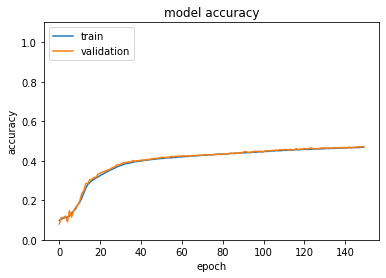

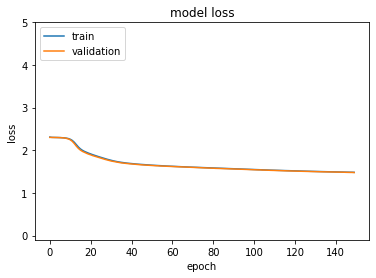

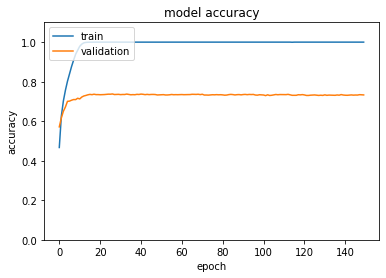

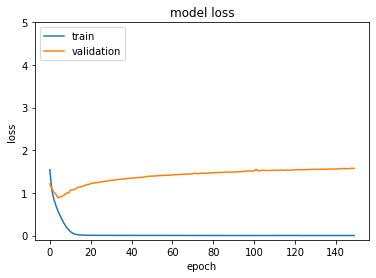

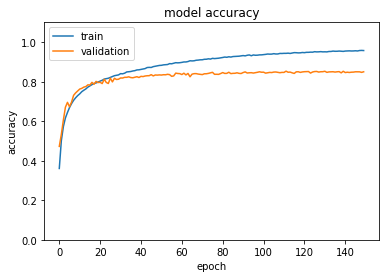

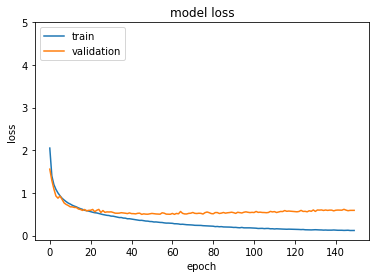

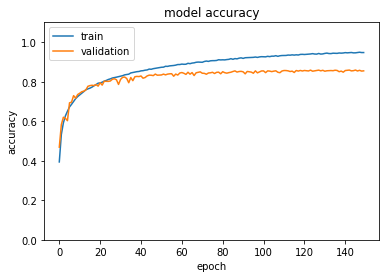

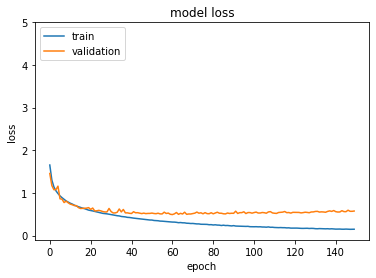

In [15]:
plot_results(history1)
plot_results(history6)
plot_results(history7)
plot_results(history8)

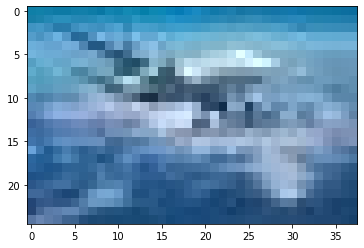

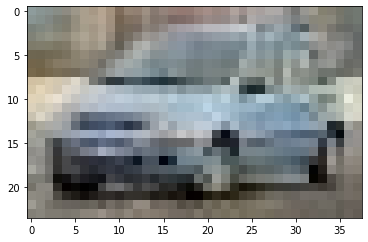

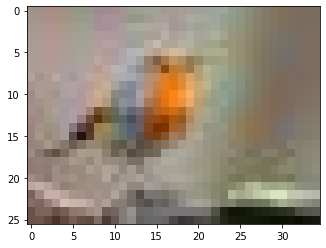

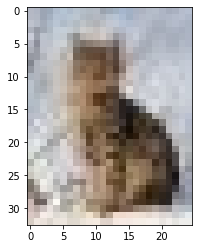

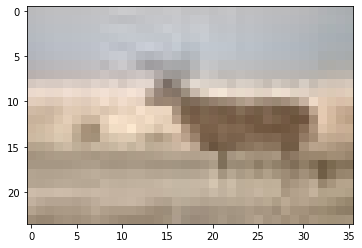

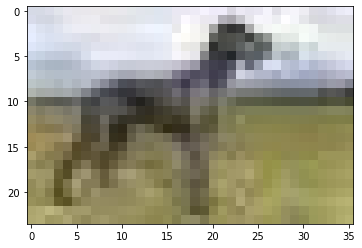

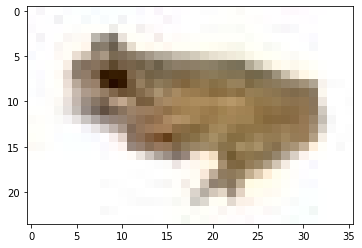

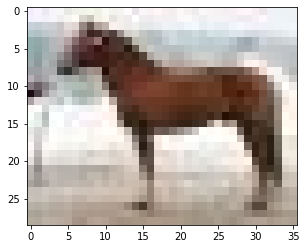

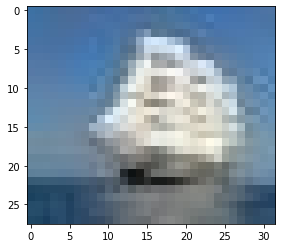

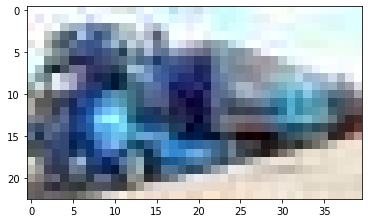

In [44]:
from PIL import Image

img0 = np.array(Image.open("airplane.jpg"))
img1 = np.array(Image.open("automobile.jpg"))
img2 = np.array(Image.open("bird.jpg"))
img3 = np.array(Image.open("cat.jpg"))
img4 = np.array(Image.open("deer.jpg"))
img5 = np.array(Image.open("dog.jpg"))
img6 = np.array(Image.open("frog.jpg"))
img7 = np.array(Image.open("horse.jpg"))
img8 = np.array(Image.open("ship.jpg"))
img9 = np.array(Image.open("truck.jpg"))

plt.imshow(img0)
plt.show()

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

plt.imshow(img3)
plt.show()

plt.imshow(img4)
plt.show()

plt.imshow(img5)
plt.show()

plt.imshow(img6)
plt.show()

plt.imshow(img7)
plt.show()

plt.imshow(img8)
plt.show()

plt.imshow(img9)
plt.show()


In [41]:
reconstructed_model = tf.keras.models.load_model("model_8")
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img0]))), "True: ", 0)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img1]))), "True: ", 1)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img2]))), "True: ", 2)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img3]))), "True: ", 3)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img3]))), "True: ", 4)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img5]))), "True: ", 5)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img6]))), "True: ", 6)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img7]))), "True: ", 7)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img8]))), "True: ", 8)
print("Pred: ", np.argmax(reconstructed_model.predict(np.array([img9]))), "True: ", 9)

Pred:  4 True:  0
Pred:  1 True:  1
Pred:  2 True:  2
Pred:  3 True:  3
Pred:  3 True:  4
Pred:  7 True:  5
Pred:  6 True:  6
Pred:  7 True:  7
Pred:  8 True:  8
Pred:  9 True:  9
